In [1]:
import pickle
import datetime
import time

import pandas as pd
import numpy as np

import scipy

import tweepy

from nltk.tokenize.casual import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tknzr = TweetTokenizer()
def tweet_tokenize(msg):
    return tknzr.tokenize(msg)

def remove_retweet(msg):
    return ' '.join(filter(lambda x:x[0]!='@' and not x.startswith('http'), msg.split()))

def convert_date(timestamp):
    if type(timestamp) is datetime.datetime:
        date = timestamp
    elif type(timestamp) is str:
        #2016-07-23 15:10:14
        date = datetime.datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S")
    else:
        date = datetime.datetime.fromtimestamp(timestamp)

    h = date.hour
    
    if h >= 23 or h <= 5:
        d_type = 0 #Night
    elif h > 5 and h <= 11:
        d_type = 1 #Morning
    elif h > 11 and h <= 18:
        d_type = 2 #Midday
    else:
        d_type = 3 #Evening
    
    return pd.Series({'Weekday':date.weekday(), 'DayPart': d_type})

def preprocess_tweet(text, date):
        text = vectorizer.transform([remove_retweet(text)])
        date = enc.transform([convert_date(date)])

        return scipy.sparse.hstack([text, date])
    
def rename_type(num):
    if num == -1:
        return 'neg'
    elif num == 1:
        return 'pos'

In [3]:
def color_types(ttype):
    color = 'red' if ttype == 'neg' else 'green'
    return 'color: %s' % color

In [4]:
with open('models/model_sgd.pkl', 'rb') as f:
    model = pickle.load(f)

with open('models/vectrorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('models/one_hot.pkl', 'rb') as f:
    enc = pickle.load(f)

In [5]:
SENTIMENT_THRESHOLD = 0.7
def predict_sentiment(model, X):
    res = list()
    
    probs = model.predict_proba(X)
    
    for i in range(len(probs)):
        p = probs[i]
        if p[0] >= SENTIMENT_THRESHOLD:
            res.append('neg')
        elif p[1] >= SENTIMENT_THRESHOLD:
            res.append('pos')
        else:
            res.append('neutral')
    
    return res

In [6]:
def plot_count(universities):
    for u in universities:
        X = pd.read_csv('data/old_tweets/' + u + '.csv', sep = ';', names = ['Date', 'Text'])
        X = X.drop_duplicates(subset=['Text'])
        
        date_col = enc.transform(X['Date'].apply(convert_date))
        tweets = vectorizer.transform(X['Text'])
        
        X_tweets = scipy.sparse.hstack([tweets, date_col])
        
#         X['Type'] = model.predict(X_tweets)
#         X['Type'] = X['Type'].apply(rename_type)
        X['Type'] = predict_sentiment(model, X_tweets)
        
        plt.figure()

        sns.countplot(x='Type', data=X)
        plt.title(u)

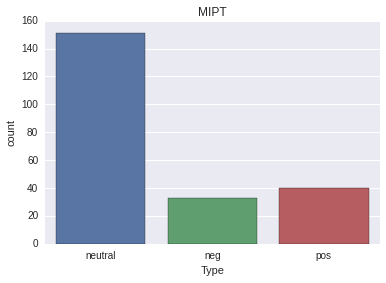

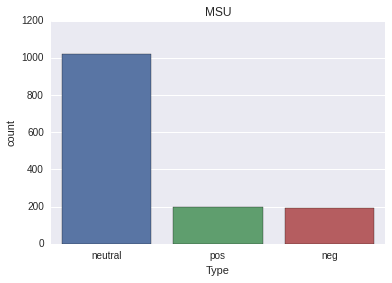

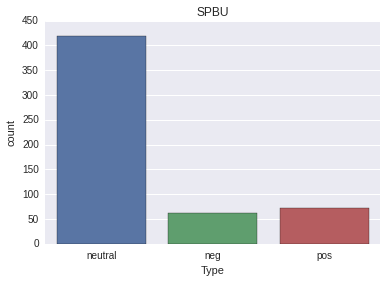

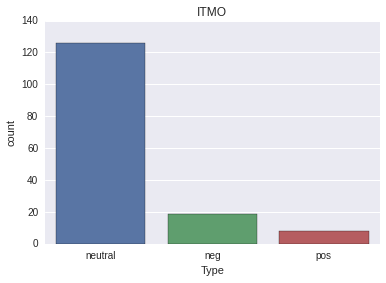

In [7]:
plot_count(['MIPT', 'MSU',  'SPBU', 'ITMO'])

In [3]:
'insert into tweets values(\'%s\', \'%s\', \'%s\', \'%s\', %d)'  % ('abc', str(512512), '515', str(51251), 1)

"insert into tweets values('abc', '512512', '515', '51251', 1)"